## **TRÍCH XUẤT WAVELET ĐẶT BIỆT**

In [ ]:
from pathlib import Path

# Thư mục notebook
NOTEBOOK_DIR = Path.cwd()

# Thư mục Cau1
ROOT_DIR = NOTEBOOK_DIR.parent

# similar và nonsimilar nằm trực tiếp trong Cau2
similar_path = ROOT_DIR / "similar"
nonsimilar_path = ROOT_DIR / "nonsimilar"

print("Similar path    :", similar_path)
print("Nonsimilar path :", nonsimilar_path)

print("Similar tồn tại    :", similar_path.exists())
print("Nonsimilar tồn tại :", nonsimilar_path.exists())

print("Số ảnh tương tự    :", len(list(similar_path.glob("*.png"))))
print("Số ảnh không tương tự:", len(list(nonsimilar_path.glob("*.png"))))

Similar path    : d:\XLH.a\BTC2\Labs_ComputerVision\Lab4\Chuong2(BaiTap)\Cau2\similar
Nonsimilar path : d:\XLH.a\BTC2\Labs_ComputerVision\Lab4\Chuong2(BaiTap)\Cau2\nonsimilar
Similar tồn tại    : True
Nonsimilar tồn tại : True
Số ảnh tương tự    : 3
Số ảnh không tương tự: 3


In [4]:
import cv2
import numpy as np
from pathlib import Path

def load_and_preprocess(image_path, size=(256, 256)):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    return img

# Test 1 ảnh
test_img_path = next(similar_path.glob("*.png"))
img = load_and_preprocess(test_img_path)

print("Shape:", img.shape)

Shape: (256, 256)


In [ ]:
import pywt

def extract_wavelet(img, wavelet='haar'):
    coeffs = pywt.dwt2(img, wavelet)
    LL, (LH, HL, HH) = coeffs
    return LL, LH, HL, HH

LL, LH, HL, HH = extract_wavelet(img)

print("LL shape:", LL.shape)

LL shape: (128, 128)


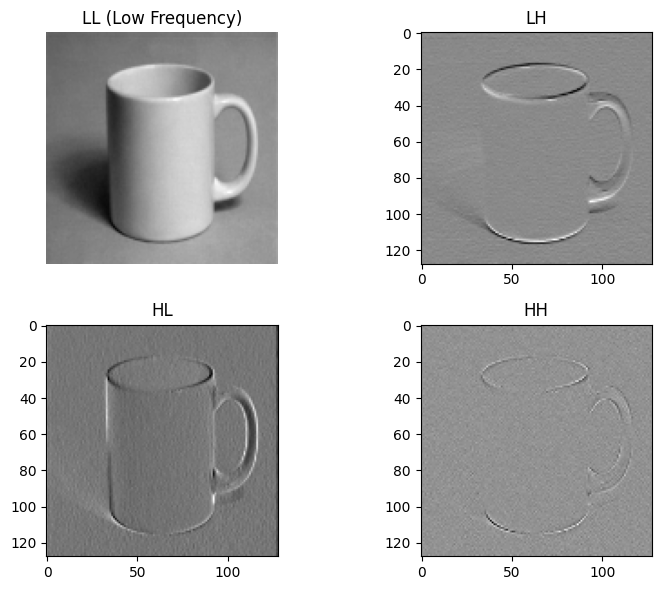

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.subplot(2,2,1)
plt.imshow(LL, cmap='gray')
plt.title("LL (Low Frequency)")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(LH, cmap='gray')
plt.title("LH")

plt.subplot(2,2,3)
plt.imshow(HL, cmap='gray')
plt.title("HL")

plt.subplot(2,2,4)
plt.imshow(HH, cmap='gray')
plt.title("HH")

plt.tight_layout()
plt.show()

In [7]:
def extract_dataset_wavelet(folder_path):
    features = []
    for img_path in folder_path.glob("*.png"):
        img = load_and_preprocess(img_path)
        LL, _, _, _ = extract_wavelet(img)
        features.append(LL)
    return features

similar_features = extract_dataset_wavelet(similar_path)
nonsimilar_features = extract_dataset_wavelet(nonsimilar_path)

print("Số feature similar:", len(similar_features))
print("Số feature nonsimilar:", len(nonsimilar_features))

Số feature similar: 3
Số feature nonsimilar: 3
